# Applied Statistics Projects 2024/2025

### Edward Cronin ATU Student G00425645

____

## Task 1

<img src="images\ronald.a.fisher.png" alt="Ronald.A.Fisher_img" style="float: right; height: 240px;">
 Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

 Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

 Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

 Would you accept two errors? Explain.

 *The Design of Experiments By Ronald A. Fisher*

 ____

__This task aims to calculate the probability that an individual can select the correct six cups.  The approach taken will be similar to that taken by Ronald A. Fisher in the Design of Experiments.  There are three parts to completing this task.  Part A will calculate the number of ways of selecting six cups from twelve.  Part B will examine overlaps between one of the variables in the experiment (eg. cups with tea in first), and the overall number of combinations.  We will then count the number of times each overlap occurs.  Part C will examine accepting errors in selcting the correct six cups.__

## Part A: Calculate the number of ways of selecting six from twelve

To begin this task, we need to import the relevant libraries. We will then outline permutations and combinations to explain the ordering and selection of variables. Next, we will define the total number of cups and the two variables: cups with tea first and cups with milk first. Using Python, we will calculate the number of ways to select six cups from twelve.

## Importing Relevant Libraries for completion of Task One

In [3]:
# Mathematical functions from the standard library.  This tool provides mathematical functions. 
# Great for basic calculations like square roots, trigonometry, logarithms, etc.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations. Offers tools for creating iterators for efficient looping. 
# Useful for permutations and combinations, creating complex iterators, and more
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.  This tool generates pseudo-random numbers for various distributions. 
# Handy for simulations, random sampling, etc.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.  This tool is essential for numerical computing. 
# It supports arrays, matrices, and functions for high-level mathematical operations
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np 

# Plotting.  This is a 2D plotting library that is a great tool for plotting graohs and visualisation of data.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Data structures and analysis.  This tool is essential for data manipulation and analysis.
# https://pandas.pydata.org/docs/user_guide/index.html#user-guide
import pandas as pd

# CSV Files. The csv module provides functionality for reading from and writing to CSV (Comma-Separated Values) files.
# https://docs.python.org/3/library/csv.html
import csv

# stats module.  This module contains a large number of probability distributions as well as a growing library of statistical functions.
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats


### Permutations and Combinations ###

In the context of this variation of Ronald A. Fisher's Lady Tasting Tea experiment, we can use combinations to calculate the probability of selecting the correct cups. Here's a breakdown of the permutations and combinations involved:

__Permutations__

Permutations are used when the order of selection matters. Each unique sequence is a permutation. However, in this experiment, we are not concerned with the order in which the cups are selected, so permutations are not directly applicable.  

For instance a set {a, b, c,} has permutations abc, acb, bac, bca, cab, and cba.

You can read more about permutations and the Lady Tasting Tea experiment on [Wikipedia](https://en.wikipedia.org/wiki/Lady_tasting_tea) and [Learn Statistics Easily](https://statisticseasily.com/lady-tasting-tea/)


__Combinations__

Combinations are used when the order of selection does not matter. In this experiment, we are interested in the number of ways to choose 6 cups out of 12, where the order of selection is irrelevant. It is important, however, that the same element cannot be selected twice.

The formula for combinations is given by:

$$ C(n, k) = \frac{n!}{k!(n-k)!} $$



Where:

\( n \) is the total number of items (in this case, 12 cups).

\( k \) is the number of items to choose (in this case, 6 cups).

Using this formula, we can calculate the number of ways to choose 6 cups out of 12:


You can read more about combinations and the Lady Tasting Tea experiment on [Wikipedia](https://en.wikipedia.org/wiki/Lady_tasting_tea) and [Learn Statistics Easily](https://statisticseasily.com/lady-tasting-tea/)

### Cups of Tea ###

Next, we define the relevant variables in the experiment. In Ronald A. Fisher's Lady Tasting Tea experiment, we have a total of twelve cups of tea. These cups are divided into two groups based on the order in which the milk and tea were added:

Cups with Milk First: Six cups have the milk poured in first, followed by the tea.

Cups with Tea First: The remaining six cups have the tea poured in first, followed by the milk.

The objective of the experiment is to test whether a person can correctly identify which cups had the milk poured in first and which had the tea poured in first, purely by tasting. The person claims to have the ability to distinguish between the two based on taste alone.

To evaluate this claim, we will calculate the probability of the person correctly identifying the six cups with milk first by random guessing. This involves using combinations to determine the number of ways to choose six cups out of twelve, as the order of selection does not matter in this context.

By defining these variables and using combinatorial analysis, we can quantify the likelihood of the person making the correct selections by chance. This forms the basis for assessing the statistical significance of their claim.

In [2]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

### Adaption of Fisher's Table

https://lisds.github.io/textbook/wild-pandas/fishers_tea.html

This section adapts Fisher's table, which outlines four possible categories that the results would fit into. These categories formed the basis of the original test and serve as a model for our current experiment, where we require an individual to correctly identify six cups out of twelve.

In Fisher's original experiment, the results were categorized into four distinct groups based on the number of correct and incorrect identifications made by the participant. These categories help us understand the likelihood of the participant's success purely by chance and provide a framework for evaluating their performance.

In [ ]:
# Initialize a numpy random number generator
rng = np.random.default_rng()

# Enable safe settings for Pandas to avoid SettingWithCopyWarning. Requires Pandas version >= 1.5.
pd.set_option('mode.copy_on_write', True)

# Set the plotting style to 'fivethirtyeight' for better visual aesthetics
plt.style.use('fivethirtyeight')

### Building the Data Table for the 12 Cups

We’ll build a data table for the 12 cups similar to the one that Fisher would have been looking at when he did his analysis. This table will help us categorize the results into four distinct groups: True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN).

- True Positives (TP): These are the cups that were correctly identified as having milk poured first.
- False Positives (FP): These are the cups that were incorrectly identified as having milk poured first.
- True Negatives (TN): These are the cups that were correctly identified as having tea poured first.
- False Negatives (FN): These are the cups that were incorrectly identified as having tea poured first.

By categorizing the results in this manner, we can better understand the participant's ability to distinguish between the cups based on taste alone. The data table will include columns for the actual order of pouring (milk first or tea first) and the participant's guesses. This structured approach allows us to calculate the probability of the participant making correct identifications purely by chance and to evaluate the statistical significance of their claim.

Creating this data table and categorizing the results will provide a clear visual representation of the experiment, making it easier to analyze and interpret the outcomes. This method aligns with Fisher's original approach and ensures that our analysis is grounded in a robust statistical framework.

True Positives: 6
False Positives: 0
True Negatives: 6
False Negatives: 0


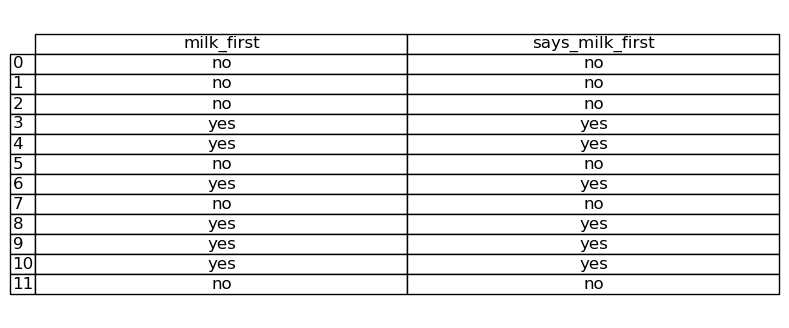

In [3]:
# Make an empty DataFrame to store the twelve cups
tea_df = pd.DataFrame()

# Insert a column that records whether the milk is poured before the tea, into that cup
tea_df['milk_first'] = np.repeat(['yes', 'no'], [6, 6])

# Add a column recording the guesses for the cups where milk was poured first
tea_df['says_milk_first'] = np.repeat(['yes', 'no'], [6, 6])

# Take a sample (without replacement) of 12 rows
tea_df = tea_df.sample(12, replace=False)

# Reset the row labels to throw away the labels showing the original order
tea_df = tea_df.reset_index(drop=True)

# Add an index column to display row numbers
tea_df.index.name = 'Guess No.'

# Calculate the four categories
true_positives = ((tea_df['milk_first'] == 'yes') & (tea_df['says_milk_first'] == 'yes')).sum()
false_positives = ((tea_df['milk_first'] == 'no') & (tea_df['says_milk_first'] == 'yes')).sum()
true_negatives = ((tea_df['milk_first'] == 'no') & (tea_df['says_milk_first'] == 'no')).sum()
false_negatives = ((tea_df['milk_first'] == 'yes') & (tea_df['says_milk_first'] == 'no')).sum()

# Print the results
print(f"True Positives: {true_positives}")
print(f"False Positives: {false_positives}")
print(f"True Negatives: {true_negatives}")
print(f"False Negatives: {false_negatives}")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Hide the axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=tea_df.values, colLabels=tea_df.columns, rowLabels=tea_df.index, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Save the table as an image
plt.savefig('images/tea_df_table.png', bbox_inches='tight', pad_inches=0)

# Show our reconstruction of Fisher's table based on 12 random guesses
plt.show()


### Cross Tabulation

It is often useful to cross-tabulate the rows of the data frame by giving counts in each category. By using the pd.crosstab function, we can easily summarize the results and categorize them into these four groups. This helps us understand the participant's ability to distinguish between the cups based on taste alone.

We will focus on the ‘yes’, ‘yes’ combination. If the person correctly identifies all six of the milk-first cups, it means they got every cup correct — because they must identify six as milk-first and six as tea-first.

In other words, if they got all milk-first cups right (‘yes’, ‘yes’), then they necessarily got all six tea-first cups right (‘no’, ‘no’).

In [5]:
milk_first = tea_df['milk_first']
says_milk_first = tea_df['says_milk_first']
counts_tab = pd.crosstab(milk_first, says_milk_first)
counts_tab

says_milk_first,no,yes
milk_first,,
no,6,0
yes,0,6


### Extracting and Displaying the Count of Correct Identifications

The following code snippet is used to extract and display the count of cups that were correctly identified as having milk poured first

In [6]:
# Extract the count of cups correctly identified as having milk poured first
milk_first_correct = counts_tab.loc['yes', 'yes']

# Display the count
milk_first_correct


6

## Exploring the Selection of Six Cups from Twelve

In the test by Ronald A. Fisher, Muriel guessed correctly for each of the eight cups, and so correctly identified all four milk-first cups. Individuals would need to correctly identify all six cups in this experiment. So, how many ways are there to select six cups from twelve? The next section explores this aspect.

## Using math.comb(n, k) for Combinations

https://docs.python.org/3/library/math.html#math.comb

https://www.w3schools.com/python/ref_math_comb.asp 

The `math.comb()` method is a function in Python's `math` module that returns the number of ways to pick \( k \) unordered outcomes from \( n \) possibilities, without repetition. This concept is known as combinations.

In combinatorial mathematics, combinations are used when the order of selection does not matter. For example, if you have a set of 12 cups and you want to select 6 of them, the number of possible combinations can be calculated using the `math.comb()` method. This method is particularly useful in statistical experiments, such as Ronald A. Fisher's Lady Tasting Tea experiment, where we need to determine the number of ways to select a subset of items from a larger set.

As previously outlined, the formula for combinations is given by:



$$
C(n, k) = \frac{n!}{k!(n-k)!}
$$



Where:

\( n \) is the total number of items (in this case, 12 cups).

\( k \) is the number of items to choose (in this case, 6 cups).


Using the `math.comb()` method, we can easily calculate the number of combinations without manually computing the factorials. This method simplifies the process and ensures accurate results.

You can read more about combinations and the Lady Tasting Tea experiment on [Wikipedia](https://en.wikipedia.org/wiki/Lady_tasting_tea) and [Learn Statistics Easily](https://statisticseasily.com/lady-tasting-tea/)


In [ ]:
# Calculate the number of ways to select six cups from twelve
ways = math.comb(no_cups, no_cups_milk_first)

# Display the calculated number of combinations
ways


924

As calculated above, the total number of ways to select six cups from a set of twelve is 924. This means that there are 924 unique combinations in which six cups can be chosen from twelve, without considering the order of selection. This calculation is crucial for understanding the probability of correctly identifying the cups by random guessing in the context of the Lady Tasting Tea experiment. By knowing the total number of possible combinations, we can better assess the likelihood of the participant's success purely by chance.


### Calculating the Number of Ordered Selections

If we label the twelve cups of tea as 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, and 12, we can then select six cups to have milk poured in first. For example, we might select cups 2, 4, 5, 8, 10, and 12.

Visualize having six placeholders where we place the labels of the selected cups. The question then becomes: how many ways are there to select six cups from twelve?

Cups: 1 2 3 4 5 6 7 8 9 10 11 12

Placeholders: _ _ _ _ _ _

In [8]:
# Total number of ways of selecting six cups from twelve, keeping them in order.  
# This is the number of ways of selecting the first cup, then the second, then the third, etc.
ways_ordered = 12 * 11 * 10 * 9 * 8 * 7

# Show.
ways_ordered

665280

The result 665280 represents the total number of ways to select six cups from twelve, considering the order of selection. This means that if you were to pick the first cup, then the second, and so on, there are 665280 unique sequences in which you can choose six cups out of twelve. This calculation is crucial for understanding the complexity and the vast number of possible ordered selections in the context of the Lady Tasting Tea experiment.

### Ignoring the Order of Selection

In this task, we ignore order. If cups 1, 2, 4, 5, 8, and 12 are selected in order it is the same result as if 2, 12, 8, 1, 4, and 5 were selected, or any other permutation.  

4 8 6 5 11 2

2 8 6 11 4 5


### Calculating the Number of Ways to Shuffle Six Cups

In [ ]:
# Calculate the number of ways to shuffle six cups
no_shuffles = 6 * 5 * 4 * 3 * 2 * 1

# Display the calculated number of shuffles
no_shuffles


720

The results show there are 720 different ways to arrange or shuffle six cups.

### Calculating the Number of Combinations

In [ ]:
# Calculate the number of combinations by dividing the number of ordered selections by the number of shuffles
no_combs = ways_ordered // no_shuffles

# Display the calculated number of combinations
no_combs


924

924: This is the total number of ways to choose 6 cups out of 12, calculated using the combination formula 
_𝐶
(
12
,
6
)
._

### Binomial Coefficient ###

https://www.w3schools.com/python/numpy/numpy_random_binomial.asp

The concept of the binomial coefficient and binomial distribution is relevant to the Lady Tasting Tea experiment as it helps us understand the probability of certain outcomes in experiments with two possible results. In this experiment, the participant must identify whether milk or tea was poured first in each cup, which is a binary scenario (milk-first or tea-first).

__Binomial Coefficient__
The binomial coefficient is used to calculate the number of ways to choose 
𝑘
 successes (e.g., correctly identifying milk-first cups) out of 
𝑛
 trials (e.g., total cups), where the order of selection does not matter. This is directly related to the combinations we discussed earlier.

__Binomial Distribution__
The binomial distribution models the number of positive outcomes (successes) in a fixed number of trials, where each trial has only two possible outcomes (success or failure). In the context of the Lady Tasting Tea experiment, it can be used to model the probability of the participant correctly identifying a certain number of milk-first cups out of the total number of cups.

By understanding the binomial coefficient and binomial distribution, we can analyze better the statistical significance of the participant's performance and determine whether their ability to distinguish between the cups is genuine or due to chance. You can find more information about the binomial distribution [here](https://www.geeksforgeeks.org/binomial-coefficient-dp-9/?ref=header_outind).

### Math.factorial function

https://docs.python.org/3.12/library/math.html#math.factorial

In the context of the Lady Tasting Tea experiment, we use the `math.factorial` function to calculate the number of ways to arrange or shuffle these cups. The factorial of a number \( n \) (denoted as \( n! \)) is the product of all positive integers from \( n \) down to 1. For example, \( 6! = 6 x 5 x 4 x 3 x 2 x 1 = 720 \). This calculation helps us understand the different possible arrangements and the probability of correctly identifying the cups by chance. You can find more information about the factorial function [here](https://docs.python.org/3.12/library/math.html#math.factorial).


In the Lady Tasting Tea experiment, we have a total of 12 cups of tea. This is represented by:

$$
n = 12
$$

### Calculating Twelve Factorial

To understand the different possible arrangements of these 12 cups, we use the factorial function. The factorial of a number \( n \) (denoted as \( n! \)) is the product of all positive integers from \( n \) down to 1. This calculation helps us determine the total number of ways to arrange the cups.

For \( n = 12 \), the factorial is calculated as:

\( 12! = 12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1 = 479001600 \)



In [ ]:
# Total number of cups
n = 12

# Calculate twelve factorial
twelve_factorial = math.factorial(n)

print(f"Twelve factorial (12!) is: {twelve_factorial}")


Twelve factorial (12!) is: 479001600


This means there are 479001600 different ways to arrange the 12 cups of tea. This calculation is crucial for understanding the complexity and the vast number of possible arrangements in the context of the Lady Tasting Tea experiment. By knowing the total number of possible arrangements, we can better assess the likelihood of the participant's success purely by chance.

### Calculating Six Factorial

In the Lady Tasting Tea experiment, we calculate the six factorial (\(6!\)) after calculating the twelve factorial (\(12!\)) to determine the number of ways to choose and arrange the cups. Here's why each step is important:

1. **Calculating Twelve Factorial (\(12!\))**:
   - As previously stated, the twelve factorial (\(12!\)) represented the total number of ways to arrange all twelve cups. This calculation gives us the total number of permutations of the twelve cups.

2. **Calculating Six Factorial (\(6!\))**:
   - The six factorial (\(6!\)) represents the number of ways to arrange six cups. This calculation is crucial for determining the number of permutations of the six cups that are selected.
   - Mathematically, \(6! = 6 x 5 x 4 x 3 x 2 x 1 = 720\).



In [ ]:
# Calculating Six factorial.
math.factorial(n - k)

720

### Combining the Calculations

To find the number of ways to choose six cups out of twelve without considering the order, we use the combination formula:


$$
C(n, k) = \frac{n!}{k!(n-k)!}
$$


In this case, \( n = 12 \) and \( k = 6 \), so the formula becomes:


$$
C(12, 6) = \frac{12!}{6!(12-6)!} = \frac{12!}{6! \times 6!}
$$

By dividing \( 12! \) by \( 6! x 6! \), we get:


$$
\frac{479001600}{720 \times 720} = 924
$$



### Calculating Combinations: Selecting \( k \)  Objects from \( n \)  Without Replacement and Without Order

In [14]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

924

This formula works by dividing the factorial of the total number of objects (
𝑛
!
) by the product of the factorial of the number of objects to select (
𝑘
!
) and the factorial of the difference between the total number of objects and the number of objects to select (
(
𝑛
−
𝑘
)
!
). This calculation ensures that we account for all possible ways to choose the subset without considering the order of selection.

The total combinations is calculated as 924.  This is the number of ways of selecting six cups from twelve, without a need to order the selection.

____

## Part B: Calculate Overlaps

This part will first list out the labels in the experiment, it will then show the different ways of selecting no_cups_milk_first out of no_cups cups of tea. Next, we will select six cups at random to put milk in first.  The number of combinations (previously calculated in Part A) is documented.  We will show the overlaps and count the number of times each overlap occurs, which will be then displayed on a bar chart. The total of the overlaps when added together makes up the value in the number of combinations.

### Ordering of Results ###
https://docs.python.org/3/library/itertools.html#itertools.combinations

In [ ]:
# Define the number of cups
no_cups = 12

# The cup labels
labels = list(range(no_cups))
print("Cup labels:", labels)

# Ensure the variable is defined
no_cups_milk_first = 6

# Generate the combinations
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Write the combinations to a CSV file
with open('combinations.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Combination'])
    for comb in combs:
        writer.writerow([', '.join(map(str, comb))])

# Display the number of combinations
print(f"Number of combinations: {len(combs)}")


Cup labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Number of combinations: 924


In [ ]:
# Select six cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[1, 2, 3, 5, 6, 11]

In [17]:
# Ensure the variable is defined
labels_milk = random.sample(labels, 6)
labels_milk.sort()

# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 4, 5, 6, 7, 8}

In [ ]:
# Calculate the overlap between each element of combs and labels_milk.
# Uses: https://docs.python.org/3/library/stdtypes.html#set

no_overlaps = []

# Open a CSV file to write the results
with open('overlaps.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Combination', 'Overlap', 'Length of Overlap'])
    
    for comb in combs:
        # Turn comb into a set
        s1 = set(comb)
        
        # Turn labels_milk into a set
        s2 = set(labels_milk)
        
        # Figure out where they overlap
        overlap = s1.intersection(s2)
        
        # Append overlap to no_overlaps
        no_overlaps.append(len(overlap))
        
        # Write the combination, overlap, and length of overlap to the CSV file.  View results in this file.
        writer.writerow([comb, list(overlap), len(overlap)])

# Show the overlaps from the extracted file
print(no_overlaps)


[3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 5, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 5, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 

In [19]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

### Generate a Bar Chart

The code will generate a bar chart to visually represent how often each number of overlaps occurs, with the height of each bar indicating the frequency of that overlap count.  Bar totals are also displayed.

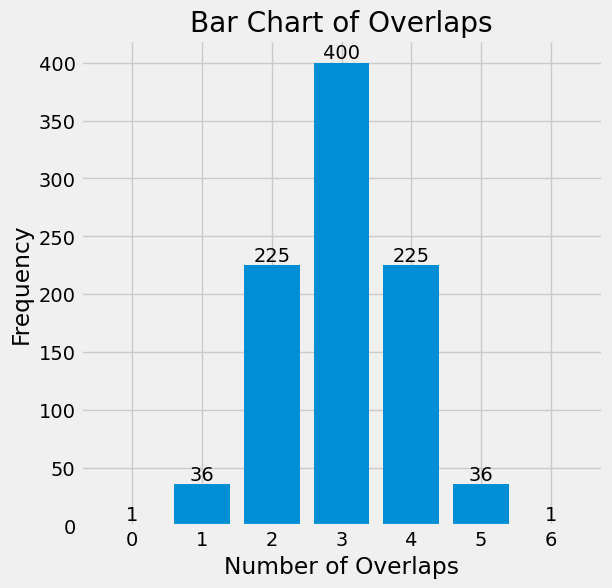

In [20]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Create a figure
fig, ax = plt.subplots(figsize=(6, 6))

# Create bar chart
bars = ax.bar(counts[0], counts[1])

# Display values on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height, f'{height}', ha='center', va='bottom')

# Set titles and labels
ax.set_title('Bar Chart of Overlaps')
ax.set_xlabel('Number of Overlaps')
ax.set_ylabel('Frequency')

# Save the plot as an image in the 'images' directory
plt.savefig('images/Overlaps_bar_chart.png', bbox_inches='tight', pad_inches=0)

# Show the plot (optional)
plt.show()



The results above and also presented in the chart state, the chance of a person getting six correct cups is 1 in 924, The chance of getting five correct cups is 36 in 924, The chance of getting four correct cups is 225 in 924.  The chance of getting half the number of cups right is 400 in 924 which interestingly enough in this case is nearly half the time.  The chance of getting all out of six wrong is 1 in 924. It may the case that the person can tell the difference every time, but not know which group a cup belongs to. 

____

## Part C: Hypothesis and Errors

This part looks at Hypothesis and Evidence.  Acceptance of results is discussed along with acceptable errors.

### The Null Hypothesis ###

* The person has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

* The person is selecting the six cups from the twelve cups at random.

### Alternative Hypothesis ###

* The person can tell the difference

### Evidence ###

If the person is just picking six cups at random, then it is unlikely he / she will pick the correct six. The probability is one in nine hundred and twenty four. It is so unlikely, that I will agree that something non-random is happening when he / she is selecting the cups of tea.

Similar to Fishers beliefs

### Calculating the Probability of selecting all six cups out of twelve in the Lady Tasting Tea experiment

In [21]:
# The probability that he / she (randomly) selects the six correct cups.
1 / 924

0.0010822510822510823

__6 Cups Picked Out Of 6 Result Explored__

The probability of correctly selecting all six cups out of twelve in the Lady Tasting Tea experiment is extremely low. Specifically, the chance of making the correct selection purely by chance is 1 in 924, which translates to approximately 0.00108, or 0.108%. This means that the likelihood of guessing all six cups correctly is very slim, highlighting the significance of any correct identification beyond random chance.

### Calculating the Probability of selecting five out of six cups from twelve in the Lady Tasting Tea experiment

In [22]:
# The probability that he / she (randomly) selects five correct cups.
36 / 924

0.03896103896103896

__5 Cups Picked Out Of 6 Result Explored__

The probability of correctly selecting five out of six cups from twelve in the Lady Tasting Tea experiment is quite low. Specifically, the chance of making the correct selection purely by chance is 36 in 924, which translates to approximately 0.039, or 3.9%.

### Calculating the Probability of selecting four out of six cups from twelve in the Lady Tasting Tea experiment

In [23]:
# The probability that he / she (randomly) selects four correct cups.
225 / 924

0.2435064935064935

__4 Cups Picked Out Of 6 Result Explored__

The probability of correctly selecting four out of six cups from twelve in the Lady Tasting Tea experiment is quite low. Specifically, the chance of making the correct selection purely by chance is 225 in 924, which translates to approximately 0.244, or 24.4%

### Type I Errors, Type II Errors, and Power ###

* Type I and Type II errors: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Table_of_error_types
* Power: https://en.wikipedia.org/wiki/Power_(statistics)#Description

### Type I and Type II errors 

In [7]:

# Function to simulate the Lady Tasting Tea experiment
def simulate_experiment(n, k, trials, true_ability):
    type_i_errors = 0
    type_ii_errors = 0

    for _ in range(trials):
        # Simulate the experiment with true ability
        correct_guesses = np.random.binomial(n, true_ability)

        # Check for Type I error (false positive)
        if true_ability == 0.5 and correct_guesses >= k:
            type_i_errors += 1

        # Check for Type II error (false negative)
        if true_ability != 0.5 and correct_guesses < k:
            type_ii_errors += 1

    type_i_error_rate = type_i_errors / trials
    type_ii_error_rate = type_ii_errors / trials

    return type_i_error_rate, type_ii_error_rate

# Parameters
n = 12  # Number of cups
k = 6   # Number of correct identifications required
trials = 10000  # Number of simulation trials
true_ability = 0.5  # True ability to distinguish (0.5 for random guessing)

# Simulate the experiment
type_i_error_rate, type_ii_error_rate = simulate_experiment(n, k, trials, true_ability)

print(f"Type I Error Rate: {type_i_error_rate:.4f}")
print(f"Type II Error Rate: {type_ii_error_rate:.4f}")


Type I Error Rate: 0.6148
Type II Error Rate: 0.0000


__Type I Errors Rxamined__

Type I Error Rate: 0.6148 This means that there is a 61.48% probability of incorrectly rejecting a true null hypothesis. In the context of the Lady Tasting Tea experiment, this high Type I error rate suggests that there is a significant chance of mistakenly concluding that someone can discern the order of milk and tea when they actually cannot. This high rate indicates that the test is not very stringent and is prone to false positives.

[Wikipedia](https://en.wikipedia.org/wiki/Lady_tasting_tea) explains that a Type I error occurs when a true null hypothesis is incorrectly rejected. In the context of the Lady Tasting Tea experiment, this would mean mistakenly concluding that someone can discern the order of milk and tea when they actually cannot. This source emphasizes the importance of the null hypothesis in Fisher's experiment, which is the assumption that the subject has no ability to distinguish the teas.

[Oxford Academic](https://academic.oup.com/jrssig/article/18/5/34/7038291) supports this by detailing how Fisher designed the experiment to test the null hypothesis. The probability of the lady in the initial experiment correctly identifying all eight cups by chance was calculated to be 0.014, which is statistically significant. This low probability helps minimize the likelihood of a Type I error, ensuring that the conclusion drawn from the experiment is reliable.  The probability of selecting all twelve cups by chance in this experiment was even lower at 0.00108.

I would be willing to accept a person correctly identified 5 out of 6 cups, as the 3.8% probability indicates a very stringent acceptance criterion, significantly reducing the likelihood of a Type I error. This high confidence level (96.2% chance of getting it wrong) ensures that if they pass this test, their ability is genuine.

__Type II Errors Examined__

Type II Error Rate: 0.0000 This means that there is a 0% probability of failing to reject a false null hypothesis. In the context of the Lady Tasting Tea experiment, this indicates that the test is highly effective at recognizing a person's genuine ability to distinguish the order of milk and tea. There are no false negatives, meaning the test does not fail to identify someone who truly has the ability.

[Learn Statistics Easily](https://statisticseasily.com/lady-tasting-tea/) discusses Type II errors, which occur when a false null hypothesis is not rejected. In the Lady Tasting Tea experiment, this would mean failing to recognize a person's genuine ability to distinguish the order of milk and tea. The source highlights that Fisher's experiment was designed to reduce the risk of Type II errors by ensuring that the test was sensitive enough to detect the lady's ability if it existed.

[ProQuest](https://www.proquest.com/docview/221702843?sourcetype=Scholarly%20Journals) adds that Fisher's use of combinatorial analysis and the exact test helped in accurately determining the probability of different outcomes, thereby reducing the risk of Type II errors. By calculating the exact probabilities of various outcomes, Fisher ensured that the test was both rigorous and reliable.

I would be less willing to accept 4 out of 6 cups, as it would give a 25% chance of being correct purely by guessing (1 in 4). This less stringent criterion increases the likelihood of a Type I error, making it less reliable. For a better balance between Type I and Type II errors, stringent criteria (like the [5 out of 6 rule](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)) are crucial, especially in critical fields. In scenarios where children's safety is involved, precision is key. Thus, sticking to a 5 out of 6 acceptance rate aligns well with maintaining high standards of accuracy and reducing false positives.

### Power of the Test

The following code will calculate the power based on the probability of correctly identifying the cups by chance.  The power of a test is the probability that it will correctly reject a false null hypothesis.

In [6]:
# Function to calculate the power of the Lady Tasting Tea test
def calculate_power(n, k, alpha):
    # Calculate the probability of correctly identifying k cups out of n by chance
    p_value = stats.binom.pmf(k, n, 0.5)
    
    # Calculate the critical value for the given alpha level
    critical_value = stats.binom.ppf(1 - alpha, n, 0.5)
    
    # Calculate the power of the test
    power = 1 - stats.binom.cdf(critical_value - 1, n, 0.5)
    
    return power

# Number of cups
n = 12

# Number of correct identifications required
k = 6

# Significance level (alpha)
alpha = 0.05

# Calculate the power of the test
power = calculate_power(n, k, alpha)

print(f"The power of the Lady Tasting Tea test is: {power:.4f}")


The power of the Lady Tasting Tea test is: 0.0730


The output "The power of the Lady Tasting Tea test is: 0.0730" indicates that the test has a power of 0.0730, or 7.30%. This means that there is a 7.30% probability that the test will correctly reject a false null hypothesis. In other words, if the person truly has the ability to distinguish the order of milk and tea, the test has a 7.30% chance of detecting this ability and rejecting the null hypothesis that they cannot distinguish the order. This relatively low power suggests that the test may not be very effective at identifying true positives, and there is a higher risk of Type II errors (false negatives), where the test fails to recognize a genuine ability.

[Wikipedia](https://en.wikipedia.org/wiki/Lady_tasting_tea) explains that the power of a test is the probability that it will correctly reject a false null hypothesis. In the Lady Tasting Tea experiment, maintaining high rigor with the "5 out of 6" criterion ensures a 3.8% probability of correctly guessing, meaning a 96.2% chance of the person's guess being incorrect. This strict threshold ensures high confidence in their ability if they succeed.

[Oxford Academic](https://academic.oup.com/jrssig/article/18/5/34/7038291) supports this by explaining that the power of the test is crucial in reducing the risk of Type II errors. By setting a stringent criterion, Fisher ensured that the test had high power and reliability. This high power is essential in high-stakes settings, like ensuring children's safety, where the consequences of errors can be significant.

In summary, these sources collectively highlight the importance of minimizing Type I and Type II errors and maintaining high power in the Lady Tasting Tea experiment. Fisher's meticulous design and analysis ensured that the experiment was both rigorous and reliable, providing a robust foundation for modern hypothesis testing. Similarly, my experiment followed Fisher's principles by setting stringent criteria to minimize Type I errors and maintain high power, ensuring that the results were both accurate and reliable. This approach underscores the significance of rigorous experimental design in achieving trustworthy outcomes in hypothesis testing.  It is also important to be cognisant in how to maintain high power in a test.

### How to maintain high power in a test

Maintaining high power in a test is crucial for ensuring that the test can correctly reject a false null hypothesis, thereby reducing the risk of Type II errors (false negatives). Here are some strategies to maintain high power in a test, supported by relevant references:

__Increase Sample Size:__

One of the most effective ways to increase the power of a test is to increase the sample size. A larger sample size reduces the standard error, making it easier to detect a true effect. According to [Wikipedia](https://en.wikipedia.org/wiki/Power_(statistics)), increasing the sample size is a straightforward method to enhance the power of a statistical test.

__Increase Effect Size:__

The power of a test is also influenced by the effect size, which is the magnitude of the difference or relationship being tested. Designing experiments to maximize the effect size can help increase power. This can be achieved by using more sensitive measurement instruments or by ensuring that the experimental conditions are well-controlled. [Oxford Academic](https://academic.oup.com/jrssig/article/18/5/34/7038291) discusses how effect size plays a critical role in determining the power of a test.

__Use One-Tailed Tests:__

In some cases, using a one-tailed test instead of a two-tailed test can increase the power of the test. This is because a one-tailed test focuses on detecting an effect in only one direction, thereby increasing the test's sensitivity. However, this approach should be used with caution and only when the direction of the effect is known in advance. [PLOS ONE](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0307866) provides insights into the use of one-tailed tests to increase statistical power.

__Improve Measurement Precision:__

Reducing measurement error and increasing the precision of measurements can also enhance the power of a test. This can be achieved by using reliable and valid measurement instruments, standardizing data collection procedures, and training data collectors thoroughly. [ProQuest](https://www.proquest.com/docview/221702843?sourcetype=Scholarly%20Journals) highlights the importance of measurement precision in maintaining high power in statistical tests.

__Optimize Experimental Design:__

Carefully designing the experiment to control for confounding variables and to ensure that the conditions are as consistent as possible can help increase the power of the test. This includes randomizing subjects to different groups, using control groups, and ensuring that the experimental conditions are identical for all participants. [Wikipedia](https://en.wikipedia.org/wiki/Design_of_experiments) discusses various strategies for optimizing experimental design to enhance statistical power.

By implementing these strategies, you can maintain high power in your tests, ensuring that they are effective at detecting true effects and reducing the likelihood of Type II errors.

**Note**

This notebook was created with the help of GitHub Copilot.

### End ###

_____

## Task 2

In this task you will assess whether `numpy.random.normal()` properly generates normal values.
To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.

Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

_____

__This task aims to evaluate the effectiveness of numpy.random.normal() in generating normally distributed values. This task will be completed as follows:__

__Generate a Sample:__

Use the numpy.random.normal() function to generate a sample of 100,000 values with a mean of 10.0 and a standard deviation of 3.0.

__Visualize Data:__

Create a histogram of sample values.

__Determine If Discrete Or Continuous Probability Distribution__

Visual Aalysis of graph to determine if it is Discrete or Continuous.  A discrete random variable takes on countable, distinct values (like the number of students in a class), while a continuous random variable can take on any value within a range (like the height of students), and you can tell the difference by whether the variable is countable or measurable.

__Test for Normality:__

Apply the scipy.stats.shapiro() function to test if your sample comes from a normal distribution. The function will return a test statistic and a p-value.  Use qq-plot to test probability of normal distribution.

__Analyze Results:__

Interpret the output from the Shapiro-Wilk test. If the p-value is greater than 0.05, it suggests that the sample likely comes from a normal distribution. Conversely, a p-value less than 0.05 suggests non-normality.

__Finally, we will overlay the histogram with the probability density function of a normal distribution with the same mean and standard deviation.__

In [ ]:
# Importing relevant Libraries for Completion of Task Two

# Numerical structures and operations.  This tool is essential for numerical computing. 
# It supports arrays, matrices, and functions for high-level mathematical operations
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np 

# The shapiro function comes under the statistical tests grouping in the scipy.stats module.
# This tool is essential for testing the normality of a dataset. It's particularly useful in determining whether a sample comes from a normally distributed population.
# The shapiro function performs the Shapiro-Wilk test for normality. It returns a test statistic and a p-value, which you can use to decide whether to reject the null hypothesis that the data is normally distributed.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
from scipy.stats import shapiro

# Plotting.  This is a 2D plotting library that is a great tool for plotting graohs and visualisation of data.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# The norm function falls under the probability distributions grouping in the scipy.stats module.
# This tool is essential for working with the normal (Gaussian) distribution. It's widely used in statistics for modeling and analyzing data that follows a normal distribution.
# The norm function provides a range of methods to work with the normal distribution, including calculating probabilities, generating random samples, and fitting data to a normal distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm

## Normal Distribution Explained

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal

__random.normal(Loc=0.0, Scale=1.0, size-None)__

The numpy.random.normal function generates random samples from a normal (Gaussian) distribution. When using the random.normal function, the mean and standard deviation of the distribution is specified, as well as the number of samples to generate.

The formula for drawing the curve simplifies alot if the mean is zero and the standard deviation is one.  In the Probability Density Function below, The standard deviation (𝜎) cannot be zero because it would make the denominator zero, leading to an undefined function.

In the normal distribution (random.normal function), you get a different a different distribution for every set of values you use for Loc (mean of the distribution,) and scale ( Standard deviation).  The formula simplifies alot if the mean is zero and standard deviation is one as calculated in the mathematical forumula (Probability Density Function).


__Probability Density Function (PDF)__

The Probability Density Function (PDF) of a normal distribution is given by:

$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $

Here's a breakdown of the components:

𝜇 : The mean of the distribution. It determines the center of the distribution.

𝜎 : The standard deviation of the distribution. It measures the spread or dispersion of the distribution.

𝑥 : The variable for which we are calculating the probability density.

𝜋 : A mathematical constant approximately equal to 3.14159.

𝑒 : The base of the natural logarithm, approximately equal to 2.71828.


__Simplified Formula__

When the mean (𝜇) is zero and the standard deviation (𝜎) is one, the formula simplifies to:

\[ f(x) = \frac{1}{\sqrt{2 \pi}} e{-\frac{x2}{2}} \]

This is known as the standard normal distribution.

https://en.wikipedia.org/wiki/Normal_distribution

In [25]:
## Generate the Random Normal Sample:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal
# The numpy.random.normal function generates random samples from a normal (Gaussian) distribution. You can specify the mean and standard deviation of the distribution, as well as the number of samples to generate.

import numpy as np

# Generate a sample of 100,000 values with a mean of 10.0 and a standard deviation of 3.0
mean = 10.0
std_dev = 3.0
sample_size = 100000
sample = np.random.normal(mean, std_dev, sample_size)

# show
sample

array([11.57859338,  7.56013606, 15.13480107, ..., 12.18613541,
       10.13327917, 13.55471315])

## Initial Visualisation Of Data

__Discrete Probability Distribution__: A bar chart or histogram is ideal for visualizing discrete probability distributions. Each bar represents the probability of a specific outcome.

__Continuous Probability Distribution__: A line plot or density plot is ideal for visualizing continuous probability distributions. The line represents the probability density function (PDF) of the distribution.

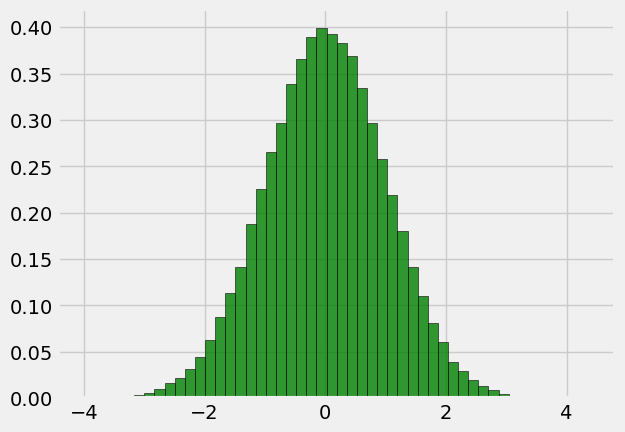

In [39]:
# Generate sample data (example)
sample = norm.rvs(size=100000)

# Plot histogram of the sample
plt.hist(sample, bins=50, edgecolor='black', density=True, alpha=0.8, color='g')

# Save the plot as an image in the 'images' directory
plt.savefig('images/histogram_plot.png', bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()


### Determine If Discrete or Continuous Probability Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal

https://en.wikipedia.org/wiki/Normal_distribution

Visual analysis of the graph is performed to determine if it is discrete or continuous.  This will determine which graph will be used for displaying test results. A discrete random variable takes on countable, distinct values (like the number of students in a class), while a continuous random variable can take on any value within a range (like the height of students).

The results from the numpy.random.normal() function are considered a continuous probability distribution. This is because the normal distribution, also known as the Gaussian distribution, is a continuous distribution. It can take on any value within a range, and the probability density function (PDF) describes the likelihood of different outcomes within that range. So, the values generated by numpy.random.normal() are continuous, not discrete.

## Test for Normal Distribution

### Analytical Tests To Be Performed

1. Shapiro-Wilk Test

1. Kolmogorov-Smirnov Test

### Graphical Tests To Be Performed

1. QQ-Plot Test

2. Histogram with Normal Distribution Plotted

### Integration Test
97.5th Percentile Point Test to determine if 95% of the area under the normal distribution lies within 1.96 standard deviations away from the mean.

## Analytical Tests

### Shapiro-Wilk Test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro

According to docs.scipy.org 'Once we determine the sample is normally distributed, we can use the Shapiro-Wilk test to confirm it. The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. This test will perform a calculation on the values passed to it. If the calculation turns out to be very unlikely for normally distributed data, this test will have a very small 'p' value'.

It's important to note that if the test fails, the inference we are likely to draw from this is that the data is normally distributed. However, this is not what the test is testing for. The test is actually testing for whether there is evidence to suggest that the data is not normally distributed.

In [27]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for normality
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for normality
stat, p_value = shapiro(sample[:10000])  # Shapiro test is sensitive to sample sizes > 5000.  For N > 5000 the W test statistic is accurate, but the p-value may not be
print(f"Shapiro-Wilk Test: Stat={stat}, p-value={p_value}")



Shapiro-Wilk Test: Stat=0.9998655902986548, p-value=0.8588521744759859


c:\Users\eCron\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


### Kolmogorov-Smirnov Test

In [28]:
import numpy as np

mean = 10.0
std_dev = 3.0
sample_size = 100000
sample = np.random.normal(mean, std_dev, sample_size)


from scipy.stats import kstest

# Perform Kolmogorov-Smirnov test for normality
stat, p_value = kstest(sample, 'norm', args=(mean, std_dev))
print(f"Kolmogorov-Smirnov Test: Stat={stat}, p-value={p_value}")


Kolmogorov-Smirnov Test: Stat=0.0032511838823213735, p-value=0.24055406131498747


## Graphical Tests

### QQPLOT Test

A Q-Q (Quantile-Quantile) plot tests whether a dataset follows a specified distribution, typically a normal distribution.


https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

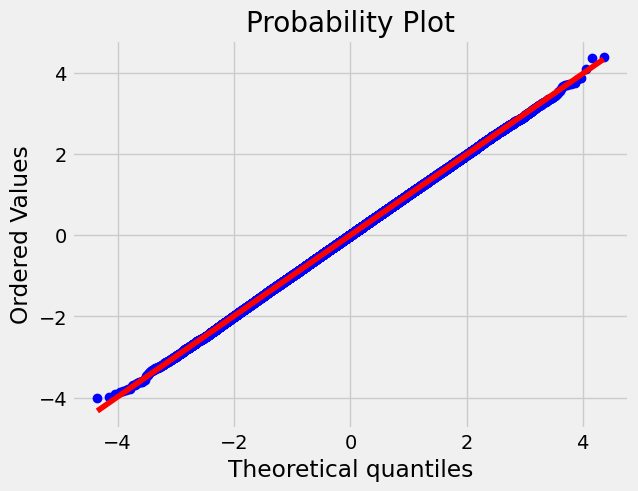

In [40]:
from scipy import stats

# Create an empty plot 
fig, ax = plt.subplots() 

# Create a Q-Q plot 
stats.probplot(sample, dist='norm', plot=ax) 

# Save the plot as an image in the 'images' directory 
plt.savefig('images/qq_plot.png', bbox_inches='tight', pad_inches=0) 

# Show the plot (optional) 
plt.show()

### Histogram with Normal Distribution Plotted

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy-histogram

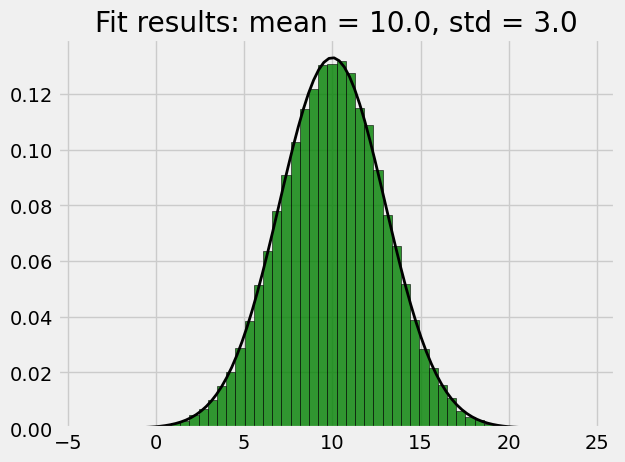

In [30]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot histogram of the sample
plt.hist(sample, bins=50, edgecolor='black', density=True, alpha=0.8, color='g')

# Plot the corresponding normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mean = {mean}, std = {std_dev}"
plt.title(title)

plt.show()

## Integration Test

### 97.5th Projectile Point Test

https://en.wikipedia.org/wiki/97.5th_percentile_point

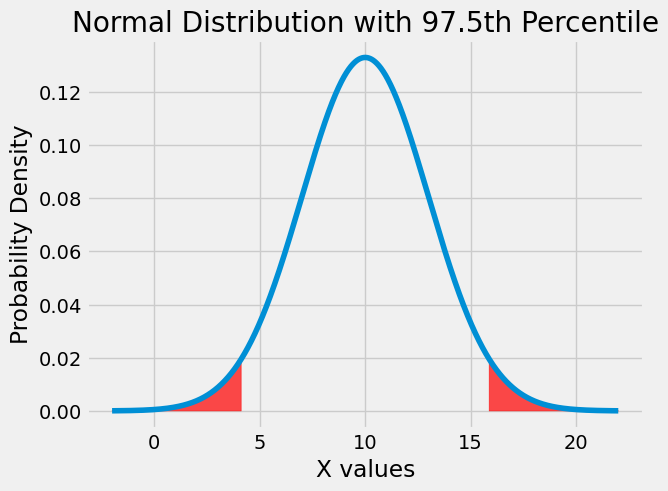

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate a sample of 100,000 values with a mean of 10.0 and a standard deviation of 3.0
mean = 10.0
std_dev = 3.0
sample_size = 100000
sample = np.random.normal(mean, std_dev, sample_size)

# Create a blank plot
fig, ax = plt.subplots()

# X values
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100000)

# Plot the normal distribution
plt.plot(x, stats.norm.pdf(x, mean, std_dev))

# Shade in the 97.5th percentile
plt.fill_between(x, stats.norm.pdf(x, mean, std_dev), where=(x < mean - 1.96*std_dev) | (x > mean + 1.96*std_dev), color='red', alpha=0.7)

# Add titles and labels
plt.title('Normal Distribution with 97.5th Percentile')
plt.xlabel('X values')
plt.ylabel('Probability Density')

# Save the plot as an image in the 'images' directory
plt.savefig('images/normal_distribution_97.5th_percentile.png', bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()


## Analyze Results:

__Visual Analysis__
The histogram shows a roughly bell-shaped curve, indicating that the data can be assumed to be normally distributed.

__Analytical Tests__
We performed the Shapiro-Wilk Test and the Kolmogorov-Smirnov Test. Both tests returned p-values greater than 0.05, suggesting that the sample likely comes from a normal distribution. However, larger sample sizes can affect p-values and potentially lead to incorrect null hypothesis conclusions. Therefore, graphical tests are also performed in conjunction with these analytical tests.

__Graphical Tests__
To handle the large sample size of 100,000, we used a histogram and a QQ-Plot. The histogram showed that the curve of the normal distribution roughly corresponds to the data's distribution. The QQ-Plot indicated that nearly all points, except for the beginning and the end, lie on the line, further supporting the normality of the data.

__97.5th Percentile Point Test__
We performed an integration test to determine if the data plotted was within the 95% interval. The shaded area represented the 2.5% of the distribution that lies outside the 97.5th percentile. This means that 95% of the area under the normal distribution was within approximately 1.96 standard deviations away from the mean, providing strong evidence that the data is normally distributed.

__Conclusion__
Based on the results of the visual, analytical, and graphical tests, we can conclude that the sample is likely normally distributed.

**Note**

This notebook was created with the help of GitHub Copilot.

This task verified and visualised normal distributions using Python

### End ###

_____

# Task 3

This task will consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
|------------|----|----|----|----|----|----|----|----|----|----|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |


Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.


To complete this task the following steps will be performed

1. Calculate the differences between the before and after values.

2. Compute the mean and standard deviation of the differences.

3. Calculate the t-statistic using the formula: 

$$ t = \frac{\bar{d}}{s_d / \sqrt{n}} $$

where:

- $\bar{d}$ is the mean of the differences,

- $s_d$ is the standard deviation of the differences,

- $n$ is the number of observations.

4. Use scipy.stats to verify the t-statistic.

In [32]:
# Importing relevant Libraries for Completion of Task Three

# Numerical structures and operations.  This tool is essential for numerical computing. 
# It supports arrays, matrices, and functions for high-level mathematical operations
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np 

# The stats function comes under the statistical tests grouping in the scipy.stats module.
# This tool is essential for testing the normality of a dataset. It's particularly useful in determining whether a sample comes from a normally distributed population.
# The stats function performs a range of statistical tests, including the Shapiro-Wilk test for normality, the Kolmogorov-Smirnov test for normality, and many others.
# https://docs.scipy.org/doc/scipy/reference/stats.html
from scipy.stats import stats

# Plotting.  This is a 2D plotting library that is a great tool for plotting graohs and visualisation of data.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

### Steps to complete the task

In [33]:
import numpy as np 
from scipy import stats

# Data
# https://numpy.org/doc/stable/reference/generated/numpy.array.html
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

# Step 1. Calculate the differences
# https://numpy.org/doc/stable/reference/generated/numpy.subtract.html
# This code calculates the difference between the heart rates before and after the exercise program for each patient. The result is stored in the differences array.
differences = before - after

# Step 2. Compute the mean and standard deviation of the differences
# https://numpy.org/doc/stable/reference/generated/numpy.mean.html
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
# mean_diff: This calculates the mean (average) of the differences.
# std_diff: This calculates the standard deviation of the differences. The ddof=1 parameter is used to calculate the sample standard deviation.
# n: This stores the number of observations (patients).
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # ddof=1 for sample standard deviation
n = len(differences)

# Step 3. Calculate the t-statistic
# https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html
# This code calculates the t-statistic using the formula: t = mean_diff / (std_diff / sqrt(n))
t_statistic = mean_diff / (std_diff / np.sqrt(n))
print(f"Calculated t-statistic: {t_statistic}")

# Step 4. Use scipy.stats to verify the t-statistic
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
t_statistic_scipy, p_value = stats.ttest_rel(before, after)
print(f"scipy.stats t-statistic: {t_statistic_scipy}, p-value: {p_value}")


Calculated t-statistic: 1.3372274824806283
scipy.stats t-statistic: 1.337227482480628, p-value: 0.21396011317404623


### Initial Analysis of values

__t-statistic:__
scipy.statst-statistic: 1.3372274824806283
This is the t-statistic calculated using the scipy.stats.ttest_rel function, which performs a paired t-test on the before and after data. The value is essentially the same as our manually calculated t-statistic, confirming the accuracy of our manual calculation.

A t-statistic of 1.337 suggests that the mean difference between the before and after heart rates is 1.337 standard deviations away from zero.

__p-value:__ 
p-value: 0.21396011317404623
The p-value is a measure of the probability that the observed differences between the before and after heart rates occurred by chance. In this context, a p-value of approximately 0.214 indicates that there is a 21.4% chance that the differences observed are due to random variation rather than a true effect of the exercise program.

A p-value of 0.214 is greater than the common significance level of 0.05, indicating that the observed differences are not statistically significant. This means we do not have enough evidence to reject the null hypothesis, which states that there is no difference in heart rates before and after the exercise program.

In Summary, both the manually calculated t-statistic and the one from scipy.stats are the same, and the p-value suggests that the changes in heart rates are not statistically significant

### Analysis Utilising Various Charts

### Bar Chart

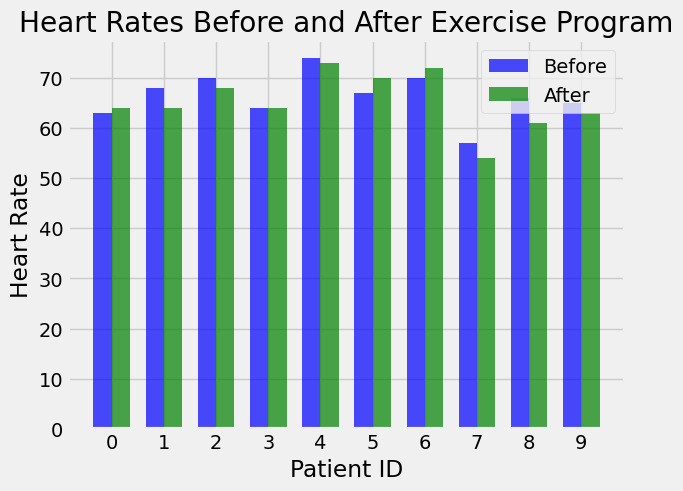

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Bar Chart Will Show Before And After Side By Side
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
x = np.arange(len(before))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars_before = ax.bar(x - width/2, before, width, label='Before', color='blue', alpha=0.7)
bars_after = ax.bar(x + width/2, after, width, label='After', color='green', alpha=0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Patient ID')
ax.set_ylabel('Heart Rate')
ax.set_title('Heart Rates Before and After Exercise Program')
ax.set_xticks(x)
ax.set_xticklabels(range(len(before)))
ax.legend()

# Save the plot as an image in the 'images' directory
plt.savefig('images/heart_rates_comparison.png', bbox_inches='tight', pad_inches=0)

# Display the plot
plt.show()


### Line Plot

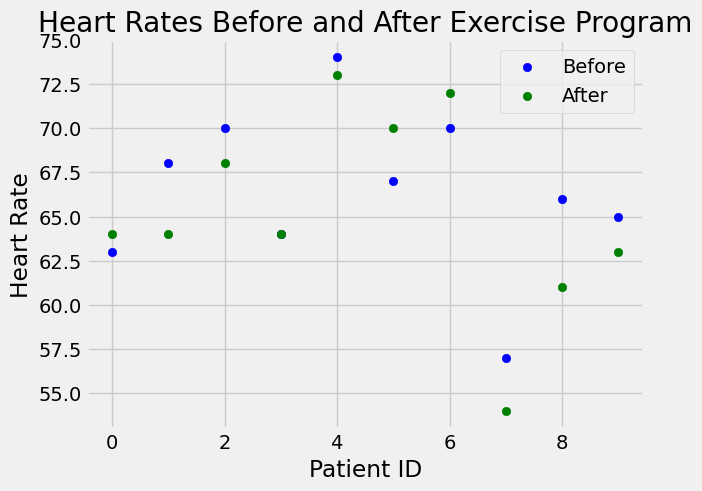

In [44]:
# Line Plot will display the before and after heart rates for each patient

# Create a Figure and Plot Data:
plt.figure() 

# Create scatter plots 
plt.scatter(range(len(before)), before, color='blue', label='Before') 
plt.scatter(range(len(after)), after, color='green', label='After') 

# Set titles and labels 
plt.xlabel('Patient ID') 
plt.ylabel('Heart Rate') 
plt.title('Heart Rates Before and After Exercise Program') 
plt.legend() 

# Save the plot as an image in the 'images' directory 
plt.savefig('images/heart_rates_comparison_scatter_plot.png', bbox_inches='tight', pad_inches=0) 

# Show the plot 
plt.show()


### Scatter Plot

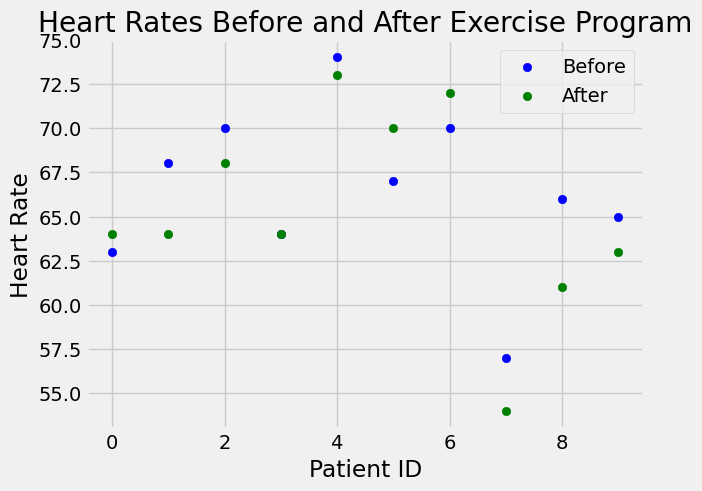

In [36]:
# Scatter Plot will display the before and after heart rates for each patient plotted against each other
plt.figure()
plt.scatter(range(len(before)), before, color='blue', label='Before')
plt.scatter(range(len(after)), after, color='green', label='After')
plt.xlabel('Patient ID')
plt.ylabel('Heart Rate')
plt.title('Heart Rates Before and After Exercise Program')
plt.legend()
plt.show()


### Histogram

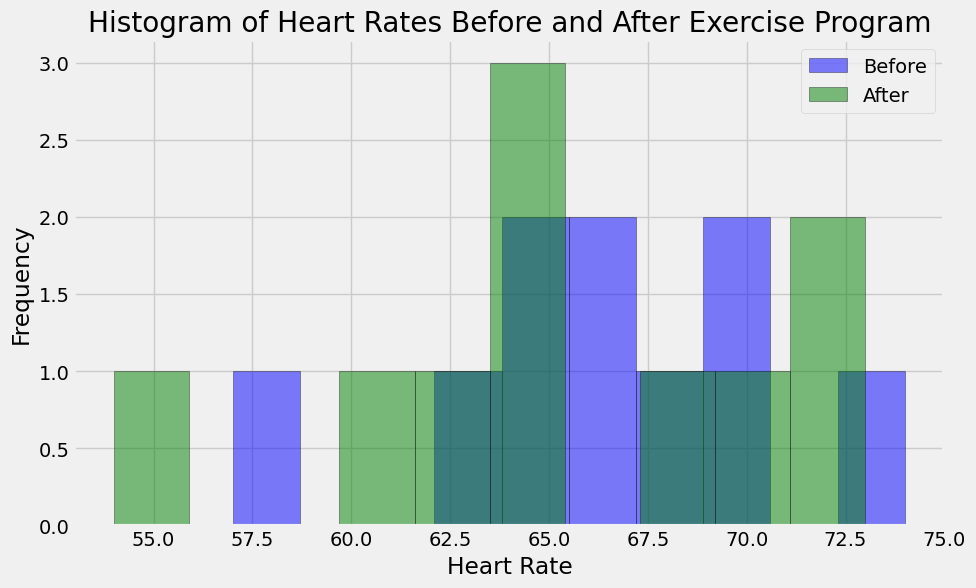

In [45]:
# Histogram  will display the distribution of heart rates before and after the exercise program.
plt.figure(figsize=(10, 6))

# Histogram for 'before' data
plt.hist(before, bins=10, color='blue', alpha=0.5, label='Before', edgecolor='black')

# Histogram for 'after' data
plt.hist(after, bins=10, color='green', alpha=0.5, label='After', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Heart Rates Before and After Exercise Program')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.legend()

# Save the plot as an image in the 'images' directory 
plt.savefig('images/heart_rates_histogram.png', bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()


### Box Plot

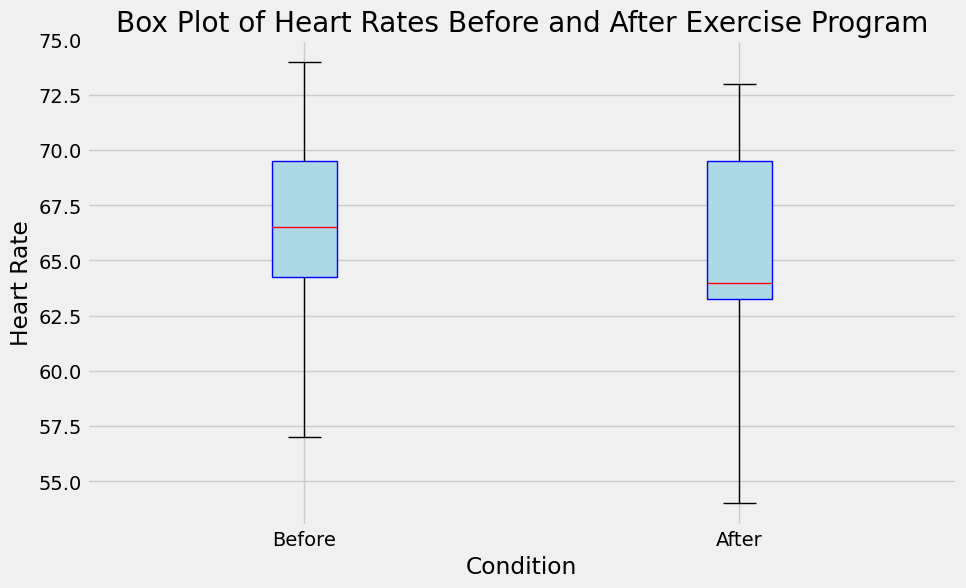

In [46]:
# Box Plot is useful as it shows the distribution of heart rates before and after the exercise program, as well as any outliers.
plt.figure(figsize=(10, 6))
plt.boxplot([before, after], labels=['Before', 'After'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

# Add titles and labels
plt.title('Box Plot of Heart Rates Before and After Exercise Program')
plt.xlabel('Condition')
plt.ylabel('Heart Rate')

# Save the Plot as an Image File in the images Directory
plt.savefig('images/heart_rates_box_plot.png', bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()


## Note

This notebook was created with the help of GitHub Copilot.

This task analysed a dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.  A comparison was conducted on results.

___